In [19]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [20]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(include_top=True, weights='imagenet')

In [21]:
# Define default image size for VGG19
image_size = (224, 224)

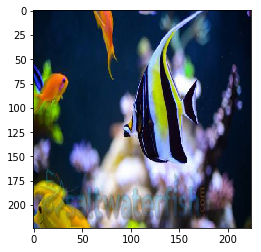

In [23]:
# Load the image and resize to default image size
image_path = os.path.join("..", "Images", "fish.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [24]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [[('n09256479', 'coral_reef', 0.3180237), ('n02606052', 'rock_beauty', 0.24372889), ('n02281406', 'sulphur_butterfly', 0.18097009)]]


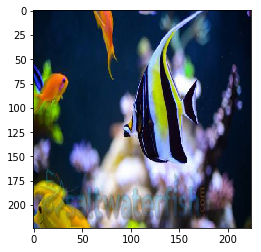

In [25]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [26]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

Predicted: [[('n01622779', 'great_grey_owl', 0.93469995), ('n01608432', 'kite', 0.008001426), ('n02018795', 'bustard', 0.006982949)]]


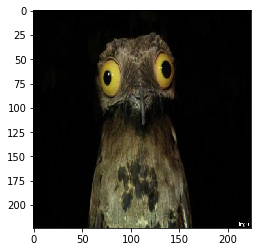

In [13]:
image_path = os.path.join("..", "Images", "bird2.jpg")
predict(image_path)